In [2]:
pip install sklearn

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Data Processing

1. Replace blank with 0
2. Converted total charges
3. Convert categorical data with one hot encoding using get_dummies
4. Uses Label Encoder to cross check and convert all data to numerical values

In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["Churn"] = df["Churn"].replace({'Yes' : '1' , "No" : '0'}).astype("int")

In [5]:
df.loc[df['TotalCharges'] == 0, 'TotalCharges'] = df['MonthlyCharges']
print(df.shape)


(7043, 21)


In [6]:
listToConvert = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=listToConvert, drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   PhoneService_Yes                       7043 non-null   uint8  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [7]:
from sklearn.preprocessing import LabelEncoder
def intConvertor(ds):
    if ds.dtype=='object':
        ds = LabelEncoder().fit_transform(ds)
    return ds

df_encoded = df_encoded.apply(lambda x: intConvertor(x))

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   PhoneService_Yes                       7043 non-null   uint8  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [8]:
from sklearn.preprocessing import LabelEncoder
def intConvertor(ds):
    if ds.dtype=='object':
        ds = LabelEncoder().fit_transform(ds)
    return ds

df = df_encoded.apply(lambda x: intConvertor(x))

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   MonthlyCharges                         7043 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn                                  7043 non-null   int64  
 6   gender_Male                            7043 non-null   uint8  
 7   Partner_Yes                            7043 non-null   uint8  
 8   Dependents_Yes                         7043 non-null   uint8  
 9   PhoneService_Yes                       7043 non-null   uint8  
 10  MultipleLines_No phone service         7043 non-null   uint8  
 11  Mult

In [9]:
for col in df_encoded.columns:
    print(f"{col} : {df_encoded[col].unique()}")

customerID : [5375 3962 2564 ... 3367 5934 2226]
SeniorCitizen : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
gender_Male : [0 1]
Partner_Yes : [1 0]
Dependents_Yes : [0 1]
PhoneService_Yes : [0 1]
MultipleLines_No phone service : [1 0]
MultipleLines_Yes : [0 1]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
OnlineSecurity_No internet service : [0 1]
OnlineSecurity_Yes : [0 1]
OnlineBackup_No internet service : [0 1]
OnlineBackup_Yes : [1 0]
DeviceProtection_No internet service : [0 1]
DeviceProtection_Yes : [0 1]
TechSupport_No internet service : [0 1]
TechSupport_Yes : [0 1]
StreamingTV_No internet service : [0 1]
StreamingTV_Yes : [0 1]


In [10]:
original_df = df_encoded
df_encoded = df_encoded.drop(columns=['customerID'])  # Assuming 'Churn' is the target variable


In [11]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


Using label Encoder we have converted values into form which can be accepted by our models

# 1. Model Building (ML and DL Models)

1. Step 1 : Shuffle the Data and split into 80:20 into training and testing. Drop the Churn class from train_x_df and make a copy to train y

In [12]:
shuffled_df = df_encoded.sample(frac = 1, random_state = 50)
train_df, test_df = shuffled_df[:5634], shuffled_df[5634:]
print(train_df)
print('X======================X========================X==========================X')
print(test_df)

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
5585              0       1           19.30         19.30      1            1   
3317              0      63           70.80       4448.80      0            1   
6875              0      64           19.45       1208.60      0            0   
6074              0       1           23.45         23.45      1            1   
1758              0      68           20.05       1386.90      0            0   
...             ...     ...             ...           ...    ...          ...   
6230              0       1           20.05         20.05      0            0   
4924              0       1           35.75         35.75      1            0   
2098              0       2           90.75        174.75      0            1   
4021              0       1           20.50         20.50      1            0   
2309              0      57           90.45       5229.80      0            1   

      Partner_Yes  Dependen

In [16]:
train_x_df = train_df.drop("Churn", axis=1)
train_y_df = train_df["Churn"].copy()


test_x_df = test_df.drop("Churn", axis=1)
test_y_df = test_df["Churn"].copy()

In [17]:
from sklearn.preprocessing import MinMaxScaler

train_x_df.fillna(train_x_df.mean(), inplace=True)
test_x_df.fillna(test_x_df.mean(), inplace=True)

scaler = MinMaxScaler()
train_x_df = scaler.fit_transform(train_x_df)
test_x_df = scaler.transform(test_x_df)

## 1 - Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1040
           1       0.67      0.55      0.60       369

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



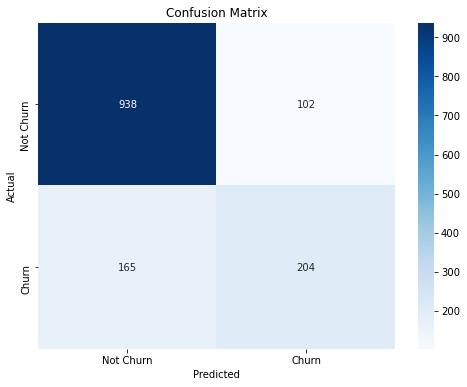

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression()
y_pred = log_reg.fit(train_x_df, train_y_df).predict(test_x_df)

print(classification_report(test_y_df, y_pred))

confusionMatrix = confusion_matrix(test_y_df, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics.plot_roc_curve(log_reg, test_x_df, test_y_df) #my laptop had a snag and the update of sklearn corrupted its metric portion

## 2 -  Gaussian Naive Bayes, Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))

confusionMatrix = confusion_matrix(test_y_df, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics.plot_roc_curve(gnb, test_x_df, test_y_df) 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
MNBA = MultinomialNB()
y_pred = MNBA.fit(train_x_df, train_y_df).predict(test_x_df)
print(classification_report(test_y_df, y_pred))

confusionMatrix = confusion_matrix(test_y_df, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics.plot_roc_curve(MNBA, test_x_df, test_y_df) 

Gaussian naive bayes gives a accuracy of 66 percent. We can surely improve this. This precision is post using one hot encoding is reducing. In this case for a normal df, the value was 77 percent for a normal data (without the one-hot encoding). One-hot encoding does not provide a positive impact(other than precision) for gaussian naive bayes because NAIVE BAYES assumes that VALUES ARE INDEPENDENT of each other, which is not true especially when we are using one-hot encoding where two values would definitely be interrelated to each other. For multinomial the accuracy bumps upto 74

Random Forest and SVM - gave accuracy as 80 percent (did not place here to reduce size of file and increasing readibility)

## 3 - Ensemble using Gini Index and Entropy for different max-Depth

In [ ]:
maxDepthList = [4, 8, 10, 15, 20]

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dtg = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score


for i in range(0,5):
    dtg = DecisionTreeClassifier(max_depth = maxDepthList[i])
    y_pred = dtg.fit(train_x_df, train_y_df)
    y_pred = dtg.predict(test_x_df)
    print("Accuracy ", (maxDepthList[i]) , "is", accuracy_score(test_y_df,y_pred), "(GINI INDEX) : Train")
    print()

print('X===========================X===========================X====================')
    
for i in range(0,5):
    dtg = DecisionTreeClassifier(criterion='entropy',max_depth = maxDepthList[i])
    y_pred = dtg.fit(train_x_df, train_y_df).predict(test_x_df)
    print("Accuracy ", (maxDepthList[i]) , "is", accuracy_score(test_y_df,y_pred), "(ENTROPY) : Test")
    print()